In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
import pickle


In [2]:
df=pd.read_csv('seeds.csv')
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.tail()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
198,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [5]:
df.shape

(199, 8)

In [6]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [7]:
df.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [8]:
df['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

In [9]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [10]:
df.skew()

Area               0.373360
Perimeter          0.355289
Compactness       -0.530437
Kernel.Length      0.500196
Kernel.Width       0.118453
Asymmetry.Coeff    0.268646
Kernel.Groove      0.535516
Type               0.009242
dtype: float64

In [11]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [12]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

There are no missing values

In [13]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Type', ylabel='count'>

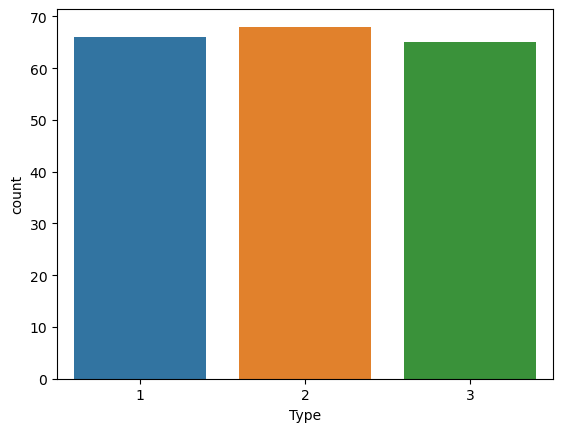

In [14]:
sns.countplot(x=df['Type'])

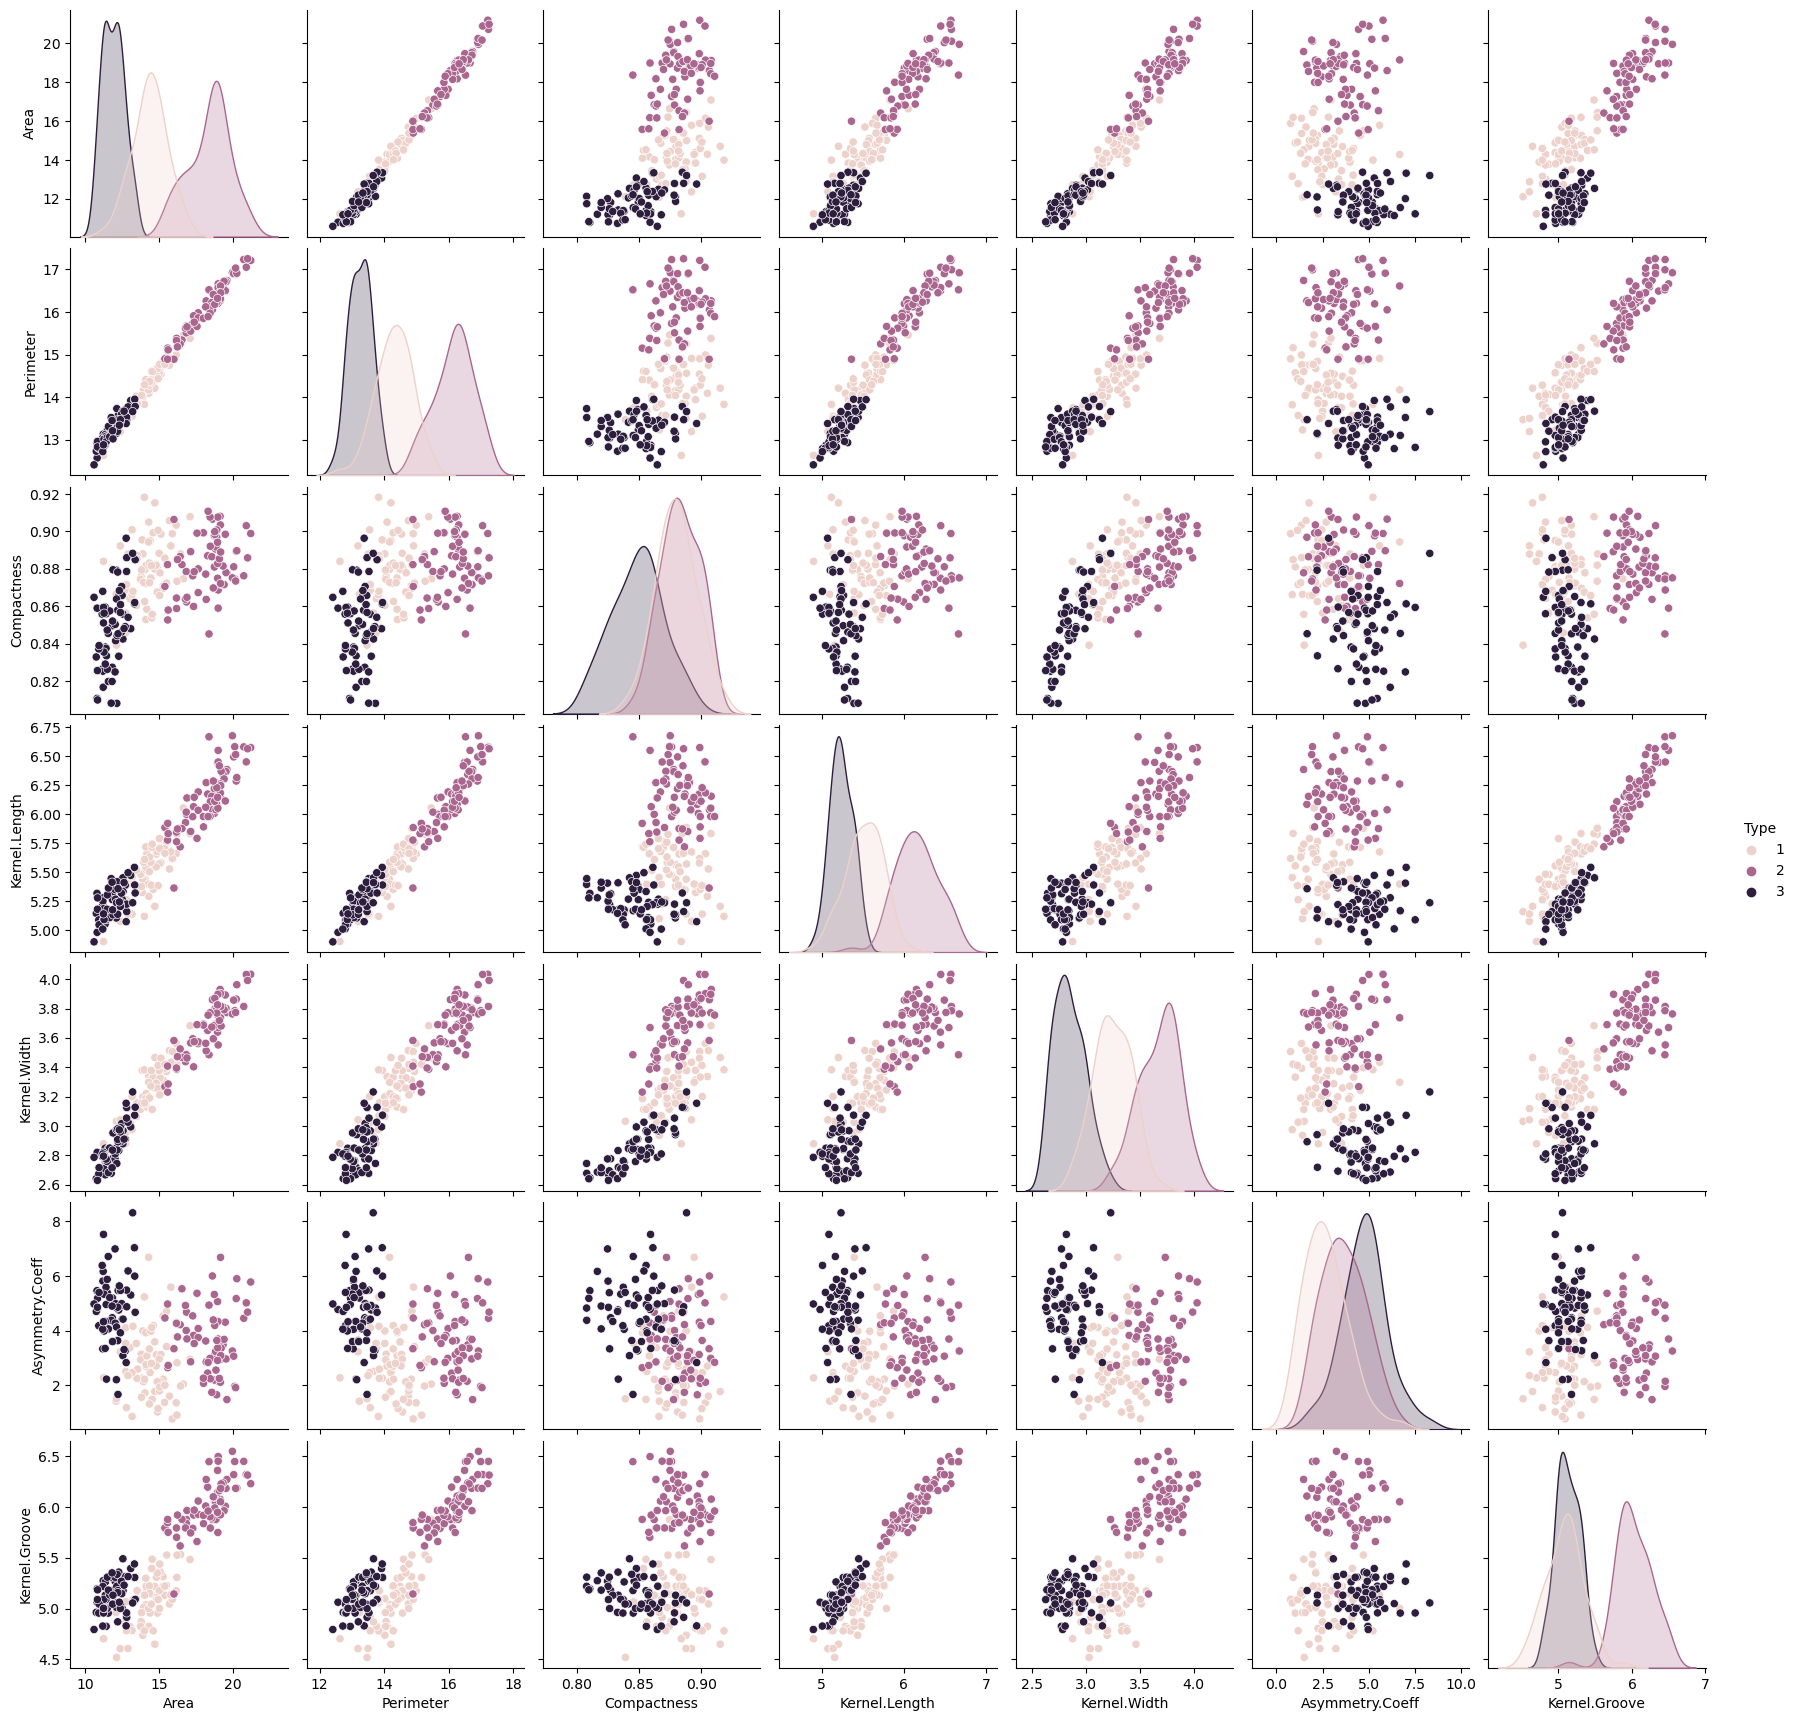

In [15]:
sns.pairplot(data=df,hue="Type")
plt.show()

<AxesSubplot:>

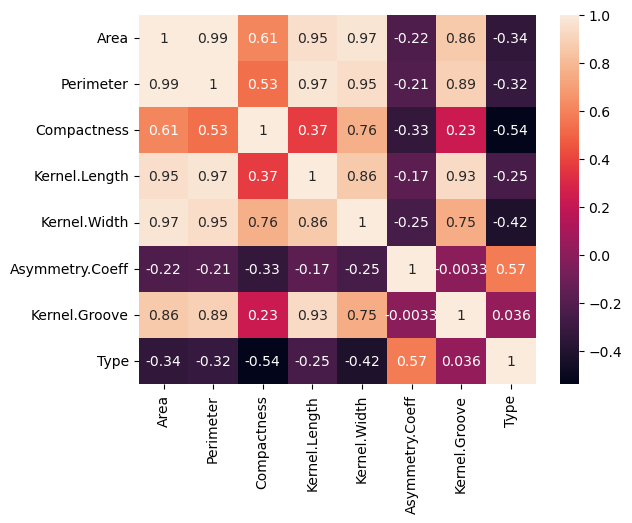

In [16]:
sns.heatmap(data=df.corr(),annot=True)

1)Area, perimeter, kernel length and kernel width are positively correlated to each other.

2)Compactness has negative correlation with Asymmetry coefficient. Compactness has positive relation with kernel width.

3)Asymmetric kernels have small area, perimeter, kernel length and kernel width


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'Kernel.Length'}>,
        <AxesSubplot:title={'center':'Kernel.Width'}>,
        <AxesSubplot:title={'center':'Asymmetry.Coeff'}>],
       [<AxesSubplot:title={'center':'Kernel.Groove'}>,
        <AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>]],
      dtype=object)

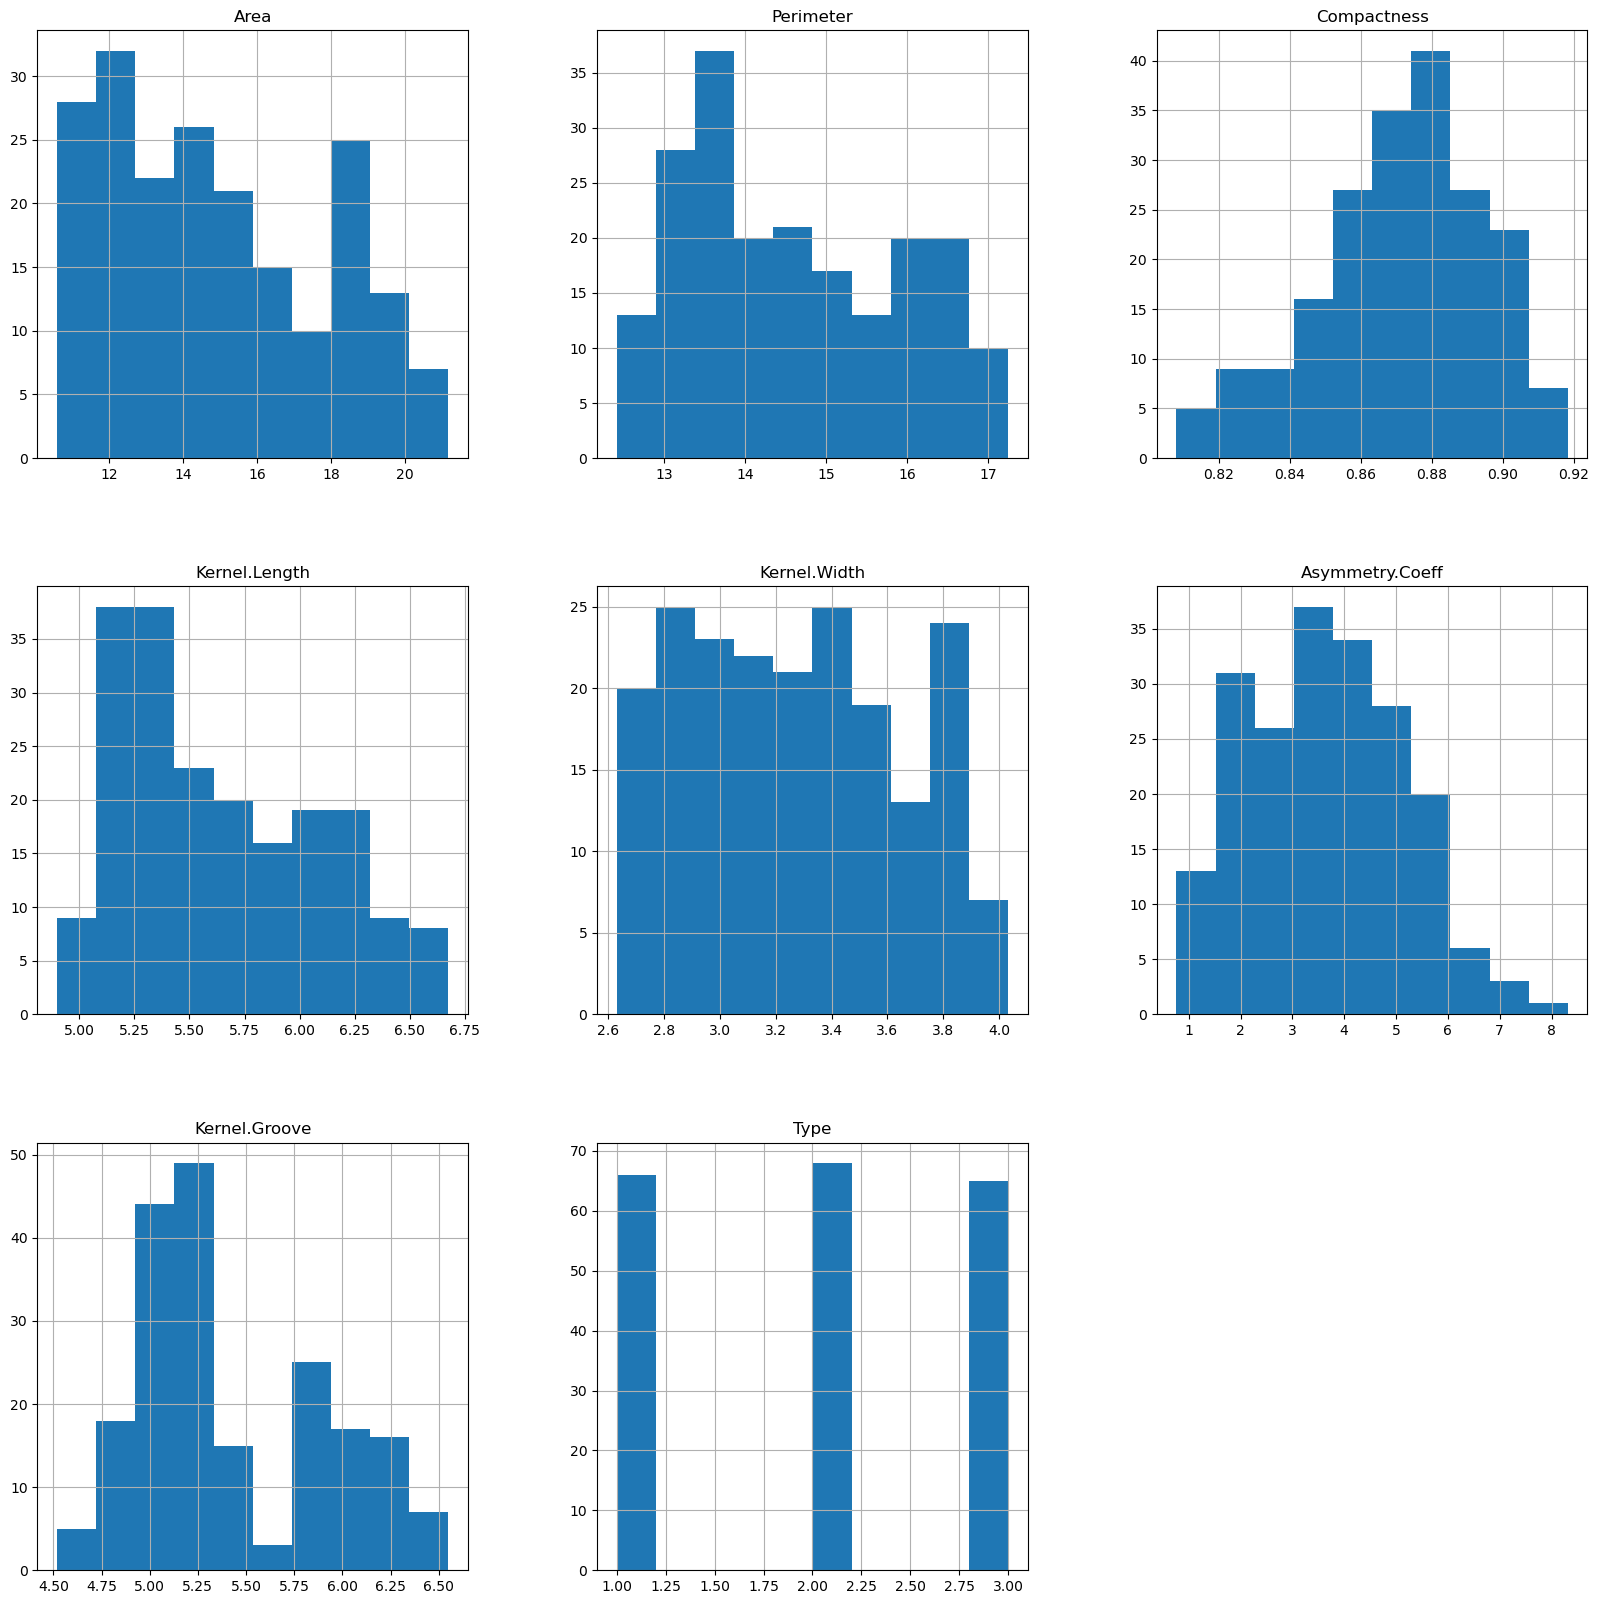

In [17]:
df.hist(figsize=(20,20))

In [18]:
df_Nan=df.copy(deep=True)
df_Nan[["Area","Perimeter","Compactness","Kernel.Length","Kernel.Width","Asymmetry.Coeff","Kernel.Groove"]]=df_Nan[["Area","Perimeter","Compactness","Kernel.Length","Kernel.Width","Asymmetry.Coeff","Kernel.Groove"]].replace(0,np.NaN)

In [19]:
df_Nan.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

C:\Users\shibu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


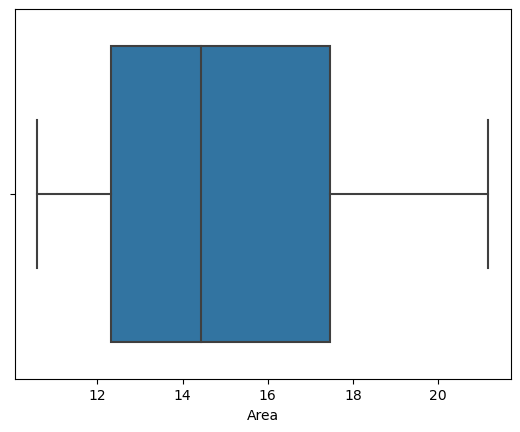

C:\Users\shibu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


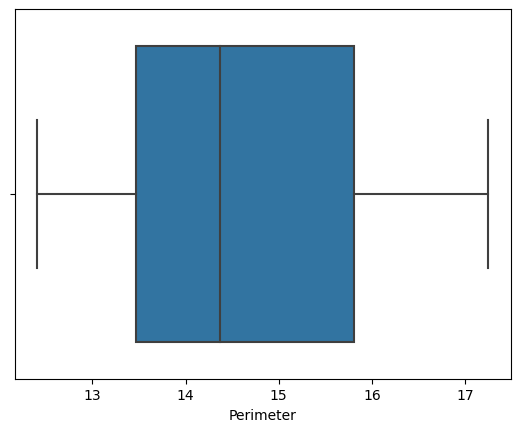

C:\Users\shibu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


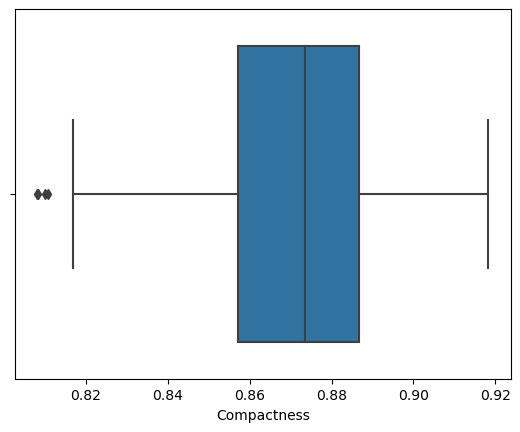

C:\Users\shibu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


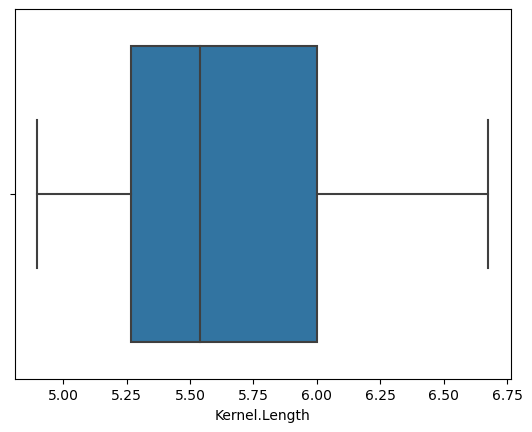

C:\Users\shibu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


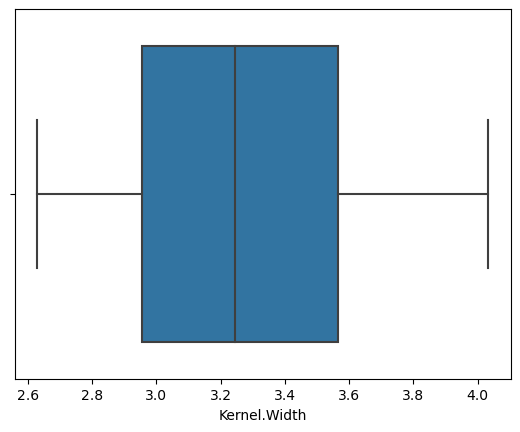

C:\Users\shibu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


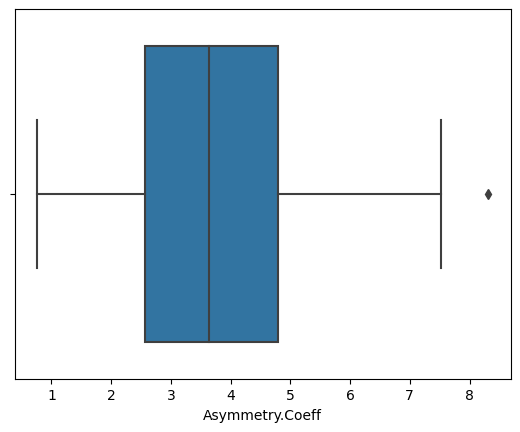

C:\Users\shibu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


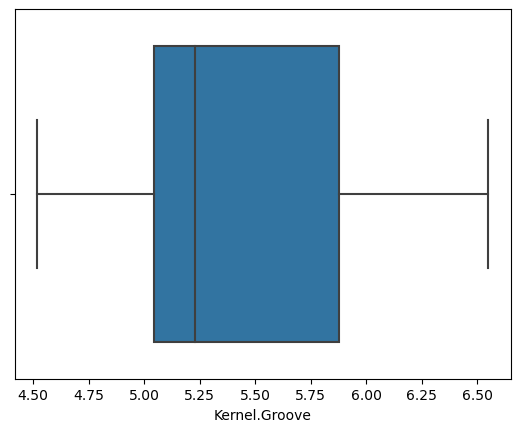

C:\Users\shibu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


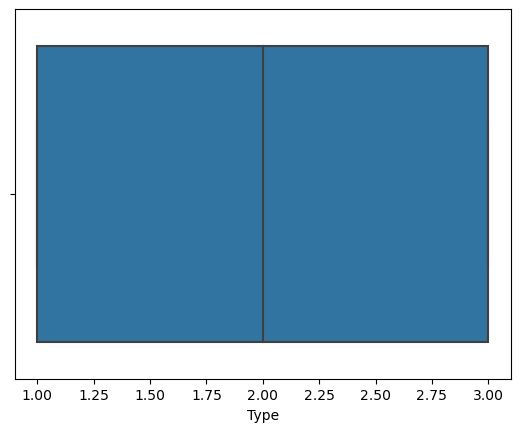

In [20]:
for col in df.select_dtypes(include=['int','float']):
    sns.boxplot(df[col])
    plt.show()

In [21]:
Q1=np.percentile(df['Compactness'],25,interpolation='midpoint')
Q2=np.percentile(df['Compactness'],50,interpolation='midpoint')
Q3=np.percentile(df['Compactness'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.8571
0.8734
0.8868


In [22]:
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [23]:
outlier=[]
for x in df['Compactness']:
    if((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)
    len(outlier)


In [24]:
outlier

[0.8107, 0.8081, 0.8082, 0.8099]

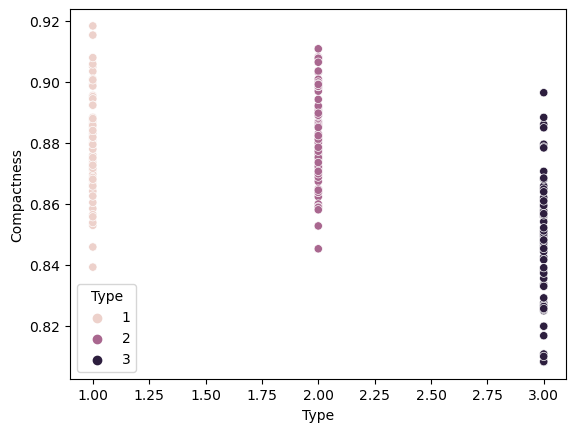

<Figure size 2000x2000 with 0 Axes>

In [25]:
sns.scatterplot(x="Type",y="Compactness",data=df,hue="Type")
plt.figure(figsize=(20,20))
plt.show()

In [26]:
Q1=np.percentile(df['Asymmetry.Coeff'],25,interpolation='midpoint')
Q2=np.percentile(df['Asymmetry.Coeff'],50,interpolation='midpoint')
Q3=np.percentile(df['Asymmetry.Coeff'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.5700000000000003
3.631
4.7989999999999995


In [27]:
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [28]:
outlier=[]
for x in df['Asymmetry.Coeff']:
    if((x>upper_limit)or(x<lower_limit)):
        outlier.append(x)
    len(outlier)

In [29]:
outlier

[8.315]

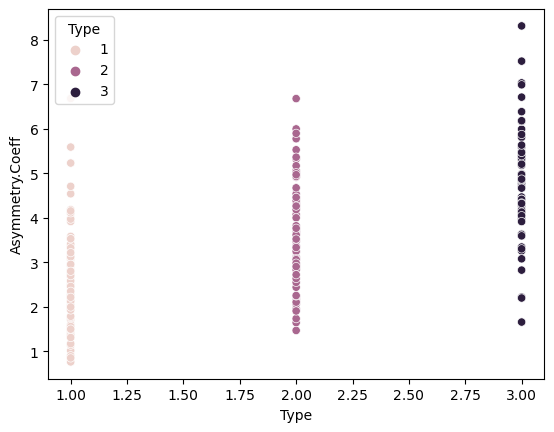

<Figure size 2000x2000 with 0 Axes>

In [30]:
sns.scatterplot(x="Type",y="Asymmetry.Coeff",data=df,hue="Type")
plt.figure(figsize=(20,20))
plt.show()

In [31]:
print(df[df["Asymmetry.Coeff"]==8.315].index.values)

[196]


In [32]:
df.iloc[196]

Area               13.2000
Perimeter          13.6600
Compactness         0.8883
Kernel.Length       5.2360
Kernel.Width        3.2320
Asymmetry.Coeff     8.3150
Kernel.Groove       5.0560
Type                3.0000
Name: 196, dtype: float64

# BUILDING THE MODEL USING RANDOM FOREST

In [36]:
#Splitting the dataset
X=df_Nan.drop(["Type"],axis=1)
Y=df_Nan['Type']

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)
X_train

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
148,11.36,13.05,0.8382,5.175,2.755,4.048,5.263
36,14.80,14.52,0.8823,5.656,3.288,3.112,5.309
45,14.99,14.56,0.8883,5.570,3.377,2.958,5.175
84,21.18,17.21,0.8989,6.573,4.033,5.780,6.231
82,18.88,16.26,0.8969,6.084,3.764,1.649,6.109
...,...,...,...,...,...,...,...
151,12.13,13.73,0.8081,5.394,2.745,4.825,5.220
67,16.84,15.67,0.8623,5.998,3.484,4.675,5.877
25,13.02,13.76,0.8641,5.395,3.026,3.373,4.825
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056


In [40]:
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [43]:
rfc_train=rfc.predict(X_train)
print("Accuracy_Score=",format(metrics.accuracy_score(Y_train,rfc_train)))

Accuracy_Score= 0.9928057553956835


In [44]:
predictions=rfc.predict(X_test)
print("Accuracy_Score=",format(metrics.accuracy_score(Y_test,predictions)))

Accuracy_Score= 0.9


In [46]:
print(classification_report(Y_test,predictions))
print("---------------")
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       1.00      1.00      1.00        23
           3       0.82      0.90      0.86        20

    accuracy                           0.90        60
   macro avg       0.89      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60

---------------
[[13  0  4]
 [ 0 23  0]
 [ 2  0 18]]


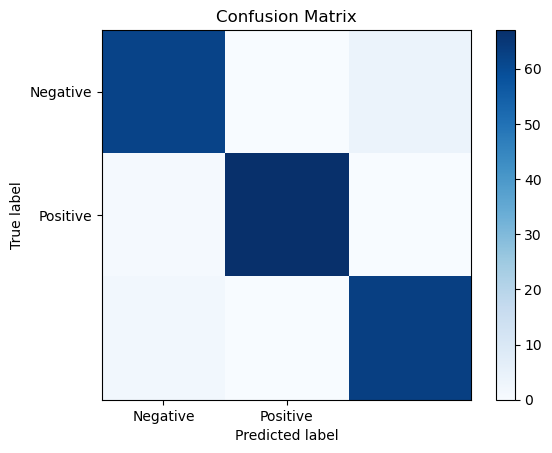

In [48]:
# Create confusion matrix
Y_pred = rfc.predict(X)
cm = confusion_matrix(Y, Y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

Confusion matrix shows the proportion of true positive prediction – dark blue colour along the diagonal and false positive prediction.